### Week 2 Day 2 Class Activity Question


Predicting Airfare on New Routes.
The following problem takes place in the United States in the late 1990s, when many major US cities were facing
issues with airport congestion, partly as a result of the 1978 deregulation of airlines. Both fares and routes were
freed from regulation, and low-fare carriers such as Southwest (SW) began competing on existing routes and starting
nonstop service on routes that previously lacked it. Building completely new airports is generally not feasible, but
sometimes decommissioned military bases or smaller municipal airports can be reconfigured as regional or larger
commercial airports. There are numerous players and interests involved in the issue (airlines, city, state and federal
authorities, civic groups, the military, airport operators), and an aviation consulting
firm is seeking advisory contracts with these players. The firm needs predictive models

(a) Explore the numerical predictors and response (FARE) by creating a correlation table and examining some
scatterplots between FARE and those predictors. What seems to be the best single predictor of FARE?
(b) Explore the categorical predictors (excluding the first four) by computing the percentage of flights in each
category. Create a pivot table with the average fare in each category. Which categorical predictor seems
best for predicting FARE?
(c) Find a model for predicting the average fare on a new route:
(i) Convert categorical variables (e.g., SW) into dummy variables. Then, partition the data into training
and validation sets. The model will be fit to the training data and evaluated on the validation set.
(ii) Use stepwise regression to reduce the number of predictors. You can ignore the first four
predictors (S_CODE, S_CITY, E_CODE, E_CITY). Report the estimated model selected.
(iii) Repeat (ii) using exhaustive search instead of stepwise regression. Compare the resulting best
model to the one you obtained in (ii) in terms of the predictors that are in the model.
(iv) Compare the predictive accuracy of both models (ii) and (iii) using measures such as RMSE and
average error and lift charts.
(v) Using model (iii), predict the average fare on a route with the following characteristics:
COUPON = 1.202, NEW = 3, VACATION = No, SW = No,HI = 4442.141, S_INCOME = $28,760, E_INCOME =
$27,664, S_POP =4,557,004, E_POP = 3,195,503, SLOT = Free, GATE = Free, PAX = 12,782,
DISTANCE = 1976 miles.
(vi) Predict the reduction in average fare on the route in (v) if Southwest decides to cover this route
[using model (iii)].
(vii) In reality, which of the factors will not be available for predicting the average fare from a new
airport (i.e., before flights start operating on those routes)? Which ones can be estimated? How?
(viii) Select a model that includes only factors that are available before flights begin to operate on the
new route. Use an exhaustive search to find such a model.
(ix) Use the model in (viii) to predict the average fare on a route with characteristics COUPON = 1.202,
NEW = 3, VACATION = No, SW = No, HI = 4442.141, S_INCOME = $28,760, E_INCOME = $27,664, S_
POP = 4,557,004, E_POP = 3,195,503, SLOT = Free, GATE = Free, PAX = 12782, DISTANCE = 1976
miles.
(x) Compare the predictive accuracy of this model with model (iii). Is this model good enough, or is it
worthwhile reevaluating the model once flights begin on the new route?
(d) In competitive industries, a new entrant with a novel business plan can have a disruptive effect on
existing firms. If a new entrant’s business model is sustainable, other players are forced to respond by changing
their business practices. If the goal of the analysis was to evaluate the effect of Southwest Airlines’ presence on
theairline industry rather than predicting fares on new routes, how would the analysis be different? Describe
technical and conceptual aspects.

## **SOLUTION**

### **PREPROCESSING**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
airfare = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING WITH PYTHON/DAY 7/Airfare.csv')

In [4]:
airfare.head(1)

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.0,3,No,Yes,5291.99,28637,21112,3036732,205711,Free,Free,312,7864,64.11


In [5]:
airfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S_CODE    638 non-null    object 
 1   S_CITY    638 non-null    object 
 2   E_CODE    638 non-null    object 
 3   E_CITY    638 non-null    object 
 4   COUPON    638 non-null    float64
 5   NEW       638 non-null    int64  
 6   VACATION  638 non-null    object 
 7   SW        638 non-null    object 
 8   HI        638 non-null    float64
 9   S_INCOME  638 non-null    int64  
 10  E_INCOME  638 non-null    int64  
 11  S_POP     638 non-null    int64  
 12  E_POP     638 non-null    int64  
 13  SLOT      638 non-null    object 
 14  GATE      638 non-null    object 
 15  DISTANCE  638 non-null    int64  
 16  PAX       638 non-null    int64  
 17  FARE      638 non-null    float64
dtypes: float64(3), int64(7), object(8)
memory usage: 89.8+ KB


**Missing Values**

In [6]:
airfare.isnull().sum()


,0
S_CODE,0
S_CITY,0
E_CODE,0
E_CITY,0
COUPON,0
NEW,0
VACATION,0
SW,0
HI,0
S_INCOME,0


**Duplicates**

In [7]:
airfare.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
633,False
634,False
635,False
636,False


In [8]:
airfare.head(1)

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.0,3,No,Yes,5291.99,28637,21112,3036732,205711,Free,Free,312,7864,64.11


In [9]:
new_airfare = airfare.drop(['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY'], axis=1)


### **A:**

In [10]:
new_airfare.head(1)

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,1.0,3,No,Yes,5291.99,28637,21112,3036732,205711,Free,Free,312,7864,64.11


In [11]:
fare_corr = new_airfare.corr(numeric_only=True)['FARE'].sort_values(ascending=False)
print("Correlation with FARE:\n", fare_corr)

Correlation with FARE:
 FARE        1.000000
DISTANCE    0.670016
COUPON      0.496537
E_INCOME    0.326092
E_POP       0.285043
S_INCOME    0.209135
S_POP       0.145097
NEW         0.091730
HI          0.025195
PAX        -0.090705
Name: FARE, dtype: float64


**Distance** has the highest correlation with **Fare**

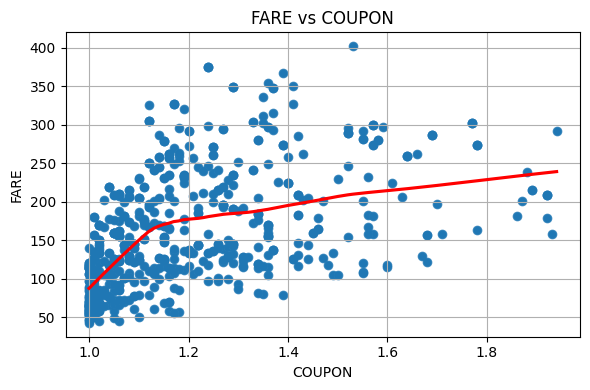

/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


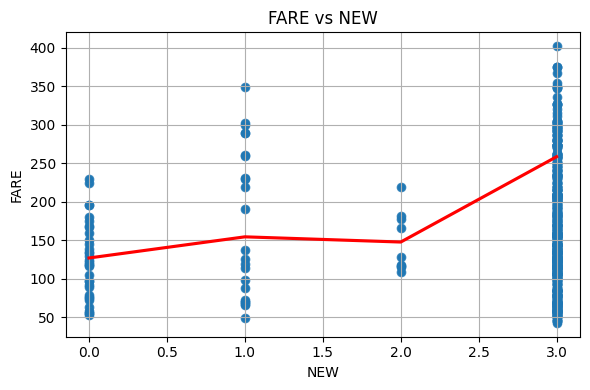

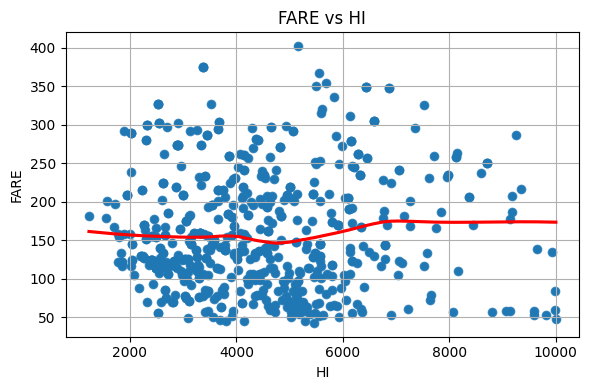

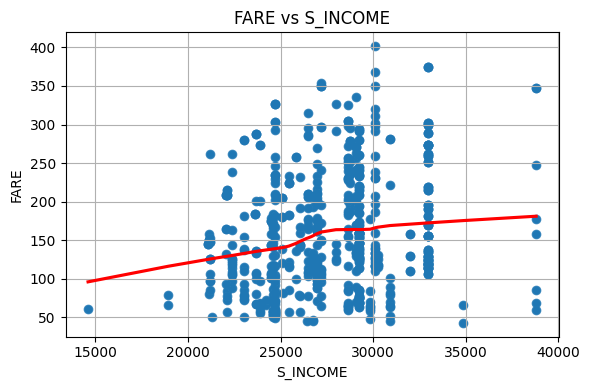

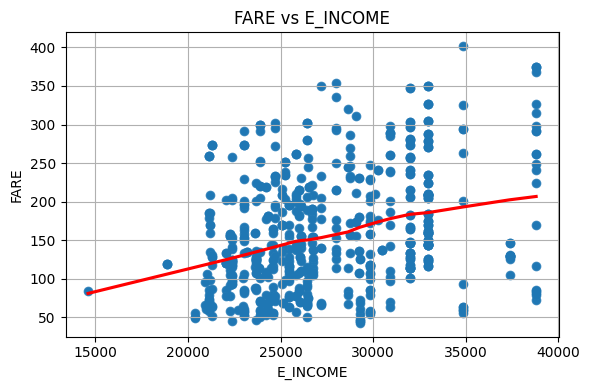

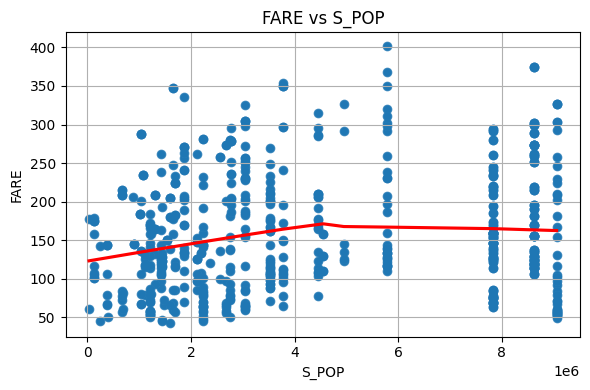

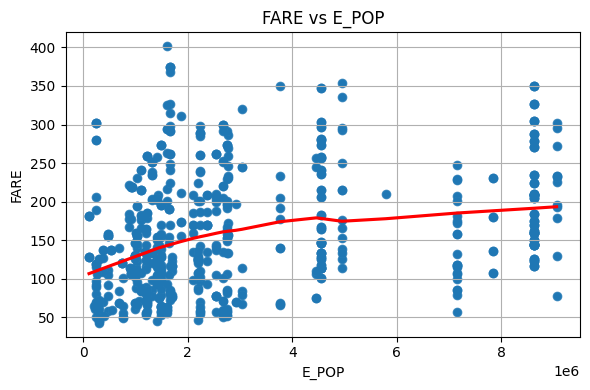

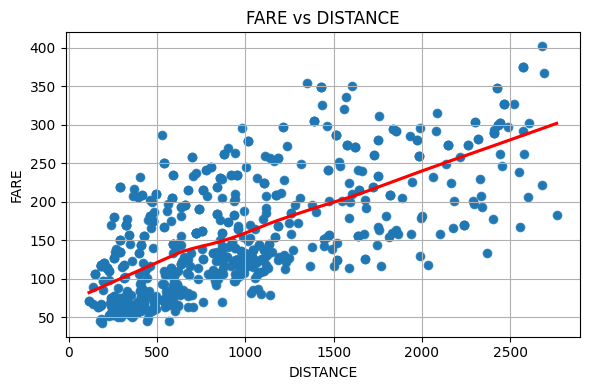

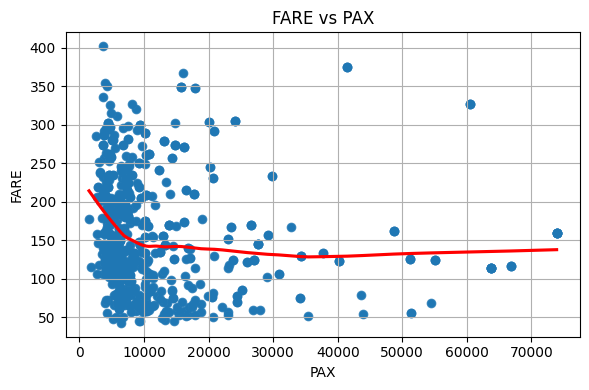

In [12]:
numerical = new_airfare.select_dtypes(include=['int64', 'float64']).drop('FARE', axis=1).columns

for col in numerical:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=new_airfare, x=col, y='FARE')
    sns.regplot(data=new_airfare, x=col, y='FARE',lowess = True, line_kws={"color": "red"})
    plt.title(f'FARE vs {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### **B:**

In [13]:
categorical = ['VACATION', 'SW', 'SLOT', 'GATE']

In [14]:
for col in categorical:
    print(f"--- {col} ---")
    print("Category %:\n", new_airfare[col].value_counts(normalize=True) * 100)
    print("\nAverage Fare:\n", new_airfare.pivot_table(values='FARE', index=col, aggfunc='mean'))
    print("\n")

--- VACATION ---
Category %:
 VACATION
No     73.354232
Yes    26.645768
Name: proportion, dtype: float64

Average Fare:
                 FARE
VACATION            
No        173.552500
Yes       125.980882


--- SW ---
Category %:
 SW
No     69.592476
Yes    30.407524
Name: proportion, dtype: float64

Average Fare:
            FARE
SW             
No   188.182793
Yes   98.382268


--- SLOT ---
Category %:
 SLOT
Free          71.473354
Controlled    28.526646
Name: proportion, dtype: float64

Average Fare:
                   FARE
SLOT                  
Controlled  186.059396
Free        150.825680


--- GATE ---
Category %:
 GATE
Free           80.564263
Constrained    19.435737
Name: proportion, dtype: float64

Average Fare:
                    FARE
GATE                   
Constrained  193.129032
Free         153.095953




**SW** is the best catergorical Predictor of Fare

### **C1:**

In [15]:
en_new_airfare = pd.get_dummies(new_airfare, columns=['VACATION', 'SW', 'SLOT', 'GATE'], drop_first=True)


In [16]:
en_new_airfare.head(1)

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE,VACATION_Yes,SW_Yes,SLOT_Free,GATE_Free
0,1.0,3,5291.99,28637,21112,3036732,205711,312,7864,64.11,False,True,True,True


In [17]:
en_new_airfare.dtypes


,0
COUPON,float64
NEW,int64
HI,float64
S_INCOME,int64
E_INCOME,int64
S_POP,int64
E_POP,int64
DISTANCE,int64
PAX,int64
FARE,float64


In [18]:
x = en_new_airfare.drop("FARE", axis=1)
y = en_new_airfare["FARE"]

In [19]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = x_train.astype(int)
x_val = x_val.astype(int)



In [20]:
print(x_train.shape)
print(x_val.shape)


(510, 13)
(128, 13)


In [21]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 597 to 102
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   COUPON        510 non-null    int64
 1   NEW           510 non-null    int64
 2   HI            510 non-null    int64
 3   S_INCOME      510 non-null    int64
 4   E_INCOME      510 non-null    int64
 5   S_POP         510 non-null    int64
 6   E_POP         510 non-null    int64
 7   DISTANCE      510 non-null    int64
 8   PAX           510 non-null    int64
 9   VACATION_Yes  510 non-null    int64
 10  SW_Yes        510 non-null    int64
 11  SLOT_Free     510 non-null    int64
 12  GATE_Free     510 non-null    int64
dtypes: int64(13)
memory usage: 55.8 KB


### **C2:**

In [46]:
import statsmodels.api as sm

x_train_const = sm.add_constant(x_train)
st_model = sm.OLS(y_train, x_train_const).fit()
print(st_model.summary())


                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 06 Aug 2025   Prob (F-statistic):          2.13e-155
Time:                        09:18:36   Log-Likelihood:                -2544.3
No. Observations:                 510   AIC:                             5115.
Df Residuals:                     497   BIC:                             5170.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
COUPON          30.0615     23.948      1.255   

In [47]:
x_train_drop = x_train.drop(['COUPON', 'NEW', 'S_INCOME'], axis=1)

x_train_const_drop = sm.add_constant(x_train_drop)

# Refit the model
st_model_1 = sm.OLS(y_train, x_train_const_drop).fit()
print(st_model_1.summary())


                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     176.5
Date:                Wed, 06 Aug 2025   Prob (F-statistic):          8.65e-157
Time:                        09:18:39   Log-Likelihood:                -2546.3
No. Observations:                 510   AIC:                             5115.
Df Residuals:                     499   BIC:                             5161.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           51.6837     14.917      3.465   

### **C3:**

In [24]:
!pip install mlxtend


In [25]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

linreg = LinearRegression()

efs = EFS(
    linreg,
    min_features=1,
    max_features=len(x_train.columns),
    scoring='r2',
    print_progress=True,
    cv=5
)

efs.fit(x_train, y_train)

# Best feature combination
best_features = list(efs.best_feature_names_)
print("Best features from Exhaustive Search:", best_features)


Features: 8191/8191

Best features from Exhaustive Search: ['COUPON', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX', 'VACATION_Yes', 'SW_Yes', 'SLOT_Free', 'GATE_Free']


In [26]:

x_train_exh = x_train[best_features]

x_train_exh_const = sm.add_constant(x_train_exh)

exh_model = sm.OLS(y_train, x_train_exh_const).fit()

print(exh_model.summary())


                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     161.1
Date:                Wed, 06 Aug 2025   Prob (F-statistic):          3.65e-156
Time:                        08:48:33   Log-Likelihood:                -2545.1
No. Observations:                 510   AIC:                             5114.
Df Residuals:                     498   BIC:                             5165.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
COUPON          23.8224     23.451      1.016   

### **C4:**

In [27]:
x_val_st = x_val[x_train_drop.columns]
x_val_st_const = sm.add_constant(x_val_st)

x_val_exh = x_val[best_features]
x_val_exh_const = sm.add_constant(x_val_exh)


y_pred_st = st_model_1.predict(x_val_st_const)
y_pred_exh = exh_model.predict(x_val_exh_const)

# Evaluate Stepwise Model
rmse_step = np.sqrt(mean_squared_error(y_val, y_pred_st))
mae_step = mean_absolute_error(y_val, y_pred_st)

# Evaluate Exhaustive Model
rmse_exh = np.sqrt(mean_squared_error(y_val, y_pred_exh))
mae_exh = mean_absolute_error(y_val, y_pred_exh)


print("Stepwise Model:")
print(f"RMSE: {rmse_step:.2f}")
print(f"Average Error (MAE): {mae_step:.2f}\n")

print("Exhaustive Search Model:")
print(f"RMSE: {rmse_exh:.2f}")
print(f"Average Error (MAE): {mae_exh:.2f}")


Stepwise Model:
RMSE: 33.88
Average Error (MAE): 24.99

Exhaustive Search Model:
RMSE: 33.52
Average Error (MAE): 24.60


### **C5:**

In [28]:
import pandas as pd

# Prepare new data for prediction (based on best_features)
new_data = pd.DataFrame([{
    'COUPON': 1.202,
    'HI': 4442.141,
    'S_INCOME': 28760,
    'E_INCOME': 27664,
    'S_POP': 4557004,
    'E_POP': 3195503,
    'DISTANCE': 1976,
    'PAX': 12782,
    'VACATION_Yes': 0,
    'SW_Yes': 0,
    'SLOT_Free': 1,
    'GATE_Free': 1
}])

new_data_const = sm.add_constant(new_data)

predicted_fare = exh_model.predict(new_data_const)
print(f"Predicted Average Fare: ${predicted_fare[0]:.2f}")


Predicted Average Fare: $254.65


### **C6:**

In [29]:
sw_new_data = pd.DataFrame([{
    'COUPON': 1.202,
    'HI': 4442.141,
    'S_INCOME': 28760,
    'E_INCOME': 27664,
    'S_POP': 4557004,
    'E_POP': 3195503,
    'DISTANCE': 1976,
    'PAX': 12782,
    'VACATION_Yes': 0,
    'SW_Yes': 1,
    'SLOT_Free': 1,
    'GATE_Free': 1
}])

sw_new_data_const = sm.add_constant(sw_new_data)

sw_new_predicted_fare = exh_model.predict(sw_new_data_const)

print(f"New Predicted Fare with SW: ${sw_new_predicted_fare[0]:.2f}")
reduction = predicted_fare - sw_new_predicted_fare[0]
print(f"Reduction in Fare if SW operates: ${reduction[0]:.2f}")


New Predicted Fare with SW: $214.12
Reduction in Fare if SW operates: $40.53


### **C7:**

You can't use PAX, COUPON, VACATION becausse there are not passageners yet.

### **C8:**

In [30]:
new_airport = [
    'NEW', 'SW_Yes', 'HI', 'S_INCOME', 'E_INCOME',
    'S_POP', 'E_POP', 'DISTANCE', 'SLOT_Free', 'GATE_Free'
]


In [31]:
x_train_new_airport = x_train[new_airport]
x_val_new_airport = x_val[new_airport]


In [32]:
linreg = LinearRegression()

efs_new_airport = EFS(
    linreg,
    min_features=1,
    max_features=len(x_train_new_airport.columns),
    scoring='r2',
    print_progress=True,
    cv=5
)

efs_new_airport.fit(x_train_new_airport, y_train)

best_new_airport_features = list(efs_new_airport.best_feature_names_)
print("Best features before flights start:", best_new_airport_features)


Features: 1023/1023

Best features before flights start: ['SW_Yes', 'HI', 'S_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'SLOT_Free', 'GATE_Free']


In [33]:
x_train_pre = x_train_new_airport[best_new_airport_features]
x_train_pre_const = sm.add_constant(x_train_pre)
model_pre = sm.OLS(y_train, x_train_pre_const).fit()
print(model_pre.summary())


                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     158.9
Date:                Wed, 06 Aug 2025   Prob (F-statistic):          3.68e-132
Time:                        08:49:01   Log-Likelihood:                -2609.8
No. Observations:                 510   AIC:                             5238.
Df Residuals:                     501   BIC:                             5276.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6696     21.086      0.411      0.6

### **C9:**

In [34]:
new_airport_data = pd.DataFrame([{
    'SW_Yes': 0,
    'HI': 4442.141,
    'S_INCOME': 28760,
    'S_POP': 4557004,
    'E_POP': 3195503,
    'DISTANCE': 1976,
    'SLOT_Free': 1,
    'GATE_Free': 1
}])


In [35]:

new_airport_data_const = sm.add_constant(new_airport_data, has_constant='add')

new_airport_data_const = new_airport_data_const[model_pre.model.exog_names]
fare_prediction_new_airport = model_pre.predict(new_airport_data_const)
print(f"Predicted Fare (Before Flights Start): ${fare_prediction_new_airport[0]:.2f}")



Predicted Fare (Before Flights Start): $243.45


### **D:**